In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [107]:
df = pd.read_csv("C:\\Users\\Al-arab\\Desktop\\softcode\\second task\\IMDb Movies India.csv",encoding='ISO-8859-1')
df["intercept"] = 1

In [108]:
df.isna().sum()
df.duplicated().sum()
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [109]:
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [110]:
df.drop(columns=["ID", "Name"], errors="ignore", inplace=True) 

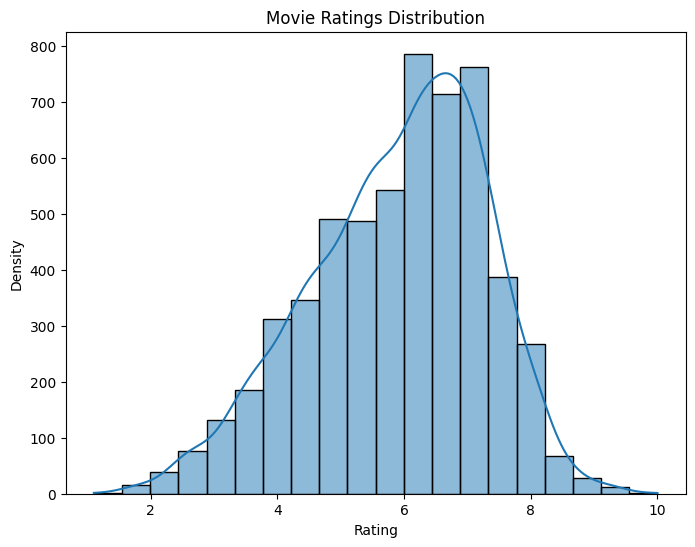

In [111]:
plt.figure(figsize=(8, 6))
sb.histplot(df['Rating'], bins=20, kde=True)
plt.title("Movie Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.show()
#The distribution of movie ratings is approximately normal, with a slight right skew. Most movies have ratings between 5 and 8,
#with fewer movies rated below 5 or above 8. 
# The KDE curve indicates that the majority of movies fall within the 6 to 8 rating range, suggesting that most movies are generally well-received by audiences.


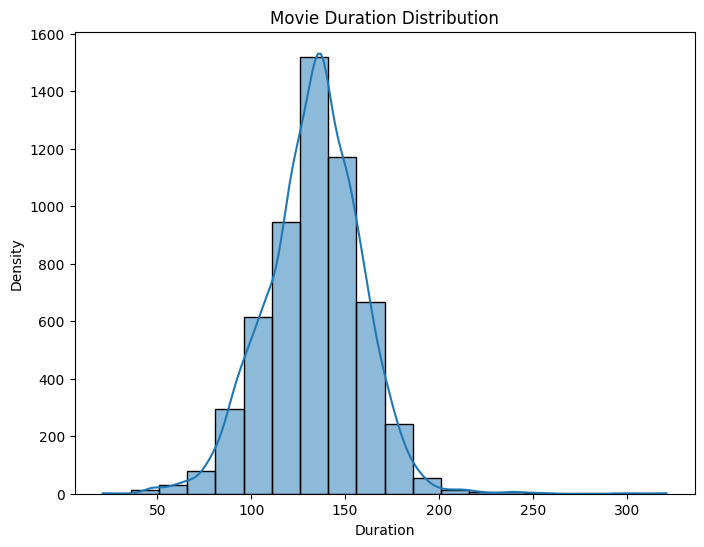

In [112]:
plt.figure(figsize=(8, 6))
sb.histplot(df['Duration'], bins=20, kde=True)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration")
plt.ylabel("Density")
plt.show()
#The distribution of movie durations is Normal distributed, with most movies falling between 100 and 150 minutes.

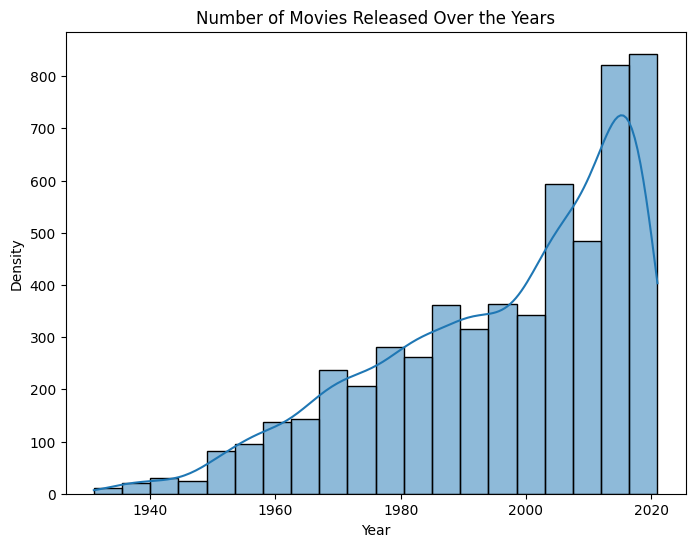

In [113]:
plt.figure(figsize=(8, 6))
sb.histplot(df['Year'], bins=20, kde=True)
plt.title("Number of Movies Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Density")
plt.show()
#The distribution of movies released over the years shows a clear upward trend, with a significant increase in the number of movies released in recent years.

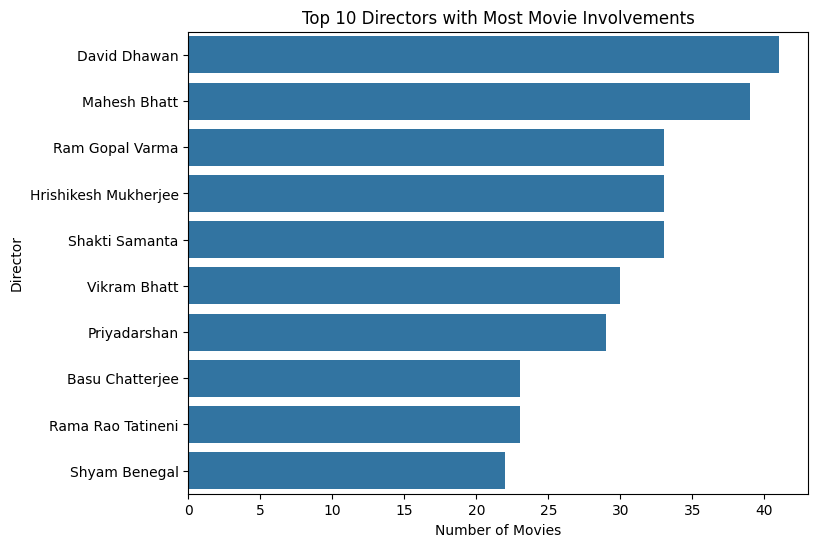

In [114]:
top_10_directors = df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_directors.values, y=top_10_directors.index)
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

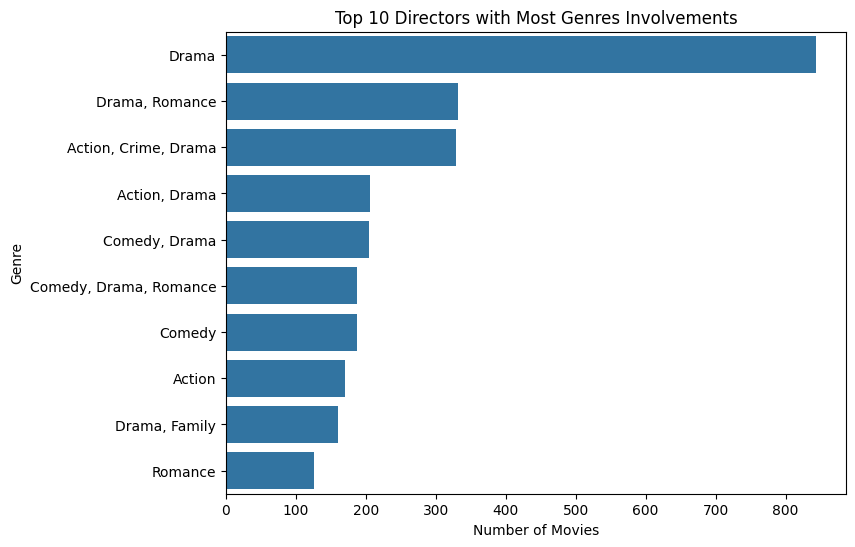

In [115]:
top_10_directors = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_directors.values, y=top_10_directors.index)
plt.title('Top 10 Directors with Most Genres Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

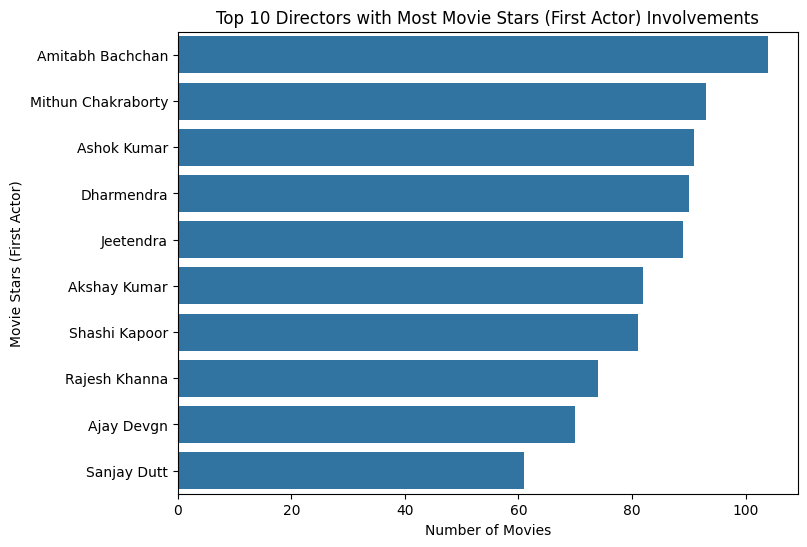

In [116]:
top_10_directors = df['Actor 1'].value_counts(ascending=False).head(10)
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_directors.values, y=top_10_directors.index)
plt.title('Top 10 Directors with Most Movie Stars (First Actor) Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Movie Stars (First Actor)')
plt.show()

In [117]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

labels = list(set(y_test)) 
target_names = list(map(str, le.inverse_transform(labels)))

print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))
#The classification report provides a detailed evaluation of the model's performance, including precision, recall, and F1-score for each class. It's very weak we can not depeend on it

              precision    recall  f1-score   support

         1.6       0.00      0.00      0.00         1
         1.9       0.00      0.00      0.00         1
         2.1       0.00      0.00      0.00         1
         2.2       0.00      0.00      0.00         1
         2.3       0.00      0.00      0.00         1
         2.4       0.00      0.00      0.00         7
         2.5       0.00      0.00      0.00         2
         2.6       0.00      0.00      0.00         3
         2.7       0.00      0.00      0.00         4
         2.8       0.00      0.00      0.00         4
         2.9       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         1
         3.1       0.00      0.00      0.00         5
         3.2       0.00      0.00      0.00         3
         3.3       0.00      0.00      0.00         9
         3.4       0.00      0.00      0.00         3
         3.5       0.00      0.00      0.00        13
         3.6       0.00    

C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classi

In [118]:
x = df[["Year", "Duration", "Votes" , "intercept"]]  
y = df["Rating"]

model = sm.OLS(y, x).fit()
model.summary()
#The R-squared value indicates that the model explains a low portion of the variance in movie ratings about 8%.
#The p-values for all variables are below 0.05, indicating that they are statistically significant predictors of movie ratings. The Durbin-Watson statistic suggests that there is no significant autocorrelation in the residuals.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:                  Rating   R-squared:                       0.080
Model:                             OLS   Adj. R-squared:                  0.080
Method:                  Least Squares   F-statistic:                     164.1
Date:              ?????, 11 ???? 2025   Prob (F-statistic):          5.02e-102
Time:                         23:18:25   Log-Likelihood:                -9620.5
No. Observations:                 5659   AIC:                         1.925e+04
Df Residuals:                     5655   BIC:                         1.928e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year          -0.0184      0.001    -19.147      0.000      -0.020      -0.016
Duration      -0.0056      0.001     -7.495      0.000      -0.007      -0.004
Votes       1.888e-05   1.32e-06     14.343      0.000    1.63e-05    2.15e-05
intercept     43.2349      1.950     22.175      0.000      39.413      47.057
==============================================================================
Omnibus:                      154.957   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.907
Skew:                          -0.378   Prob(JB):                     1.05e-38
Kurtosis:                       3.413   Cond. No.                     1.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""